# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

New = pd.merge(mouse_metadata,study_results , how = 'right', on = 'Mouse ID')
# Display the data table for preview
New.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
new1 = New["Mouse ID"].nunique()
new1


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#New_df =New[New.duplicated()]
#New_df
dup_ID = New.loc[New.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_records = New.loc[New['Mouse ID'] == "g989"]
duplicate_records

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
New_drop =New[New['Mouse ID'] != "g989"]
New_drop.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
new_count = New_drop["Mouse ID"].nunique()
new_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
mean = New_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = New_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = New_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = New_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = New_drop.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_data = pd.DataFrame({"Mean Tumor Volume":mean,
                            "Median Tumor Volume":median,
                            "Tumor Volume Varience":var,
                            "Tumor Volume Std. Dev.":std,
                            "Tumor Valume Std. Err.":sem})
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std. Dev.,Tumor Valume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
series = ['mean','median','var','std','sem']
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = New_drop.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

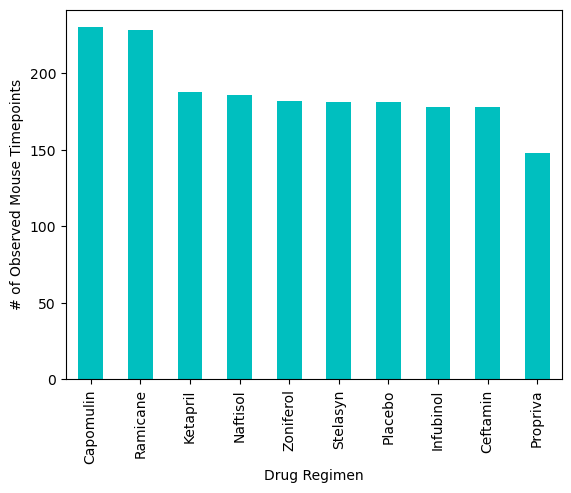

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_ct = New_drop["Drug Regimen"].value_counts()
plot_pandas = mice_ct.plot.bar(color = 'c')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


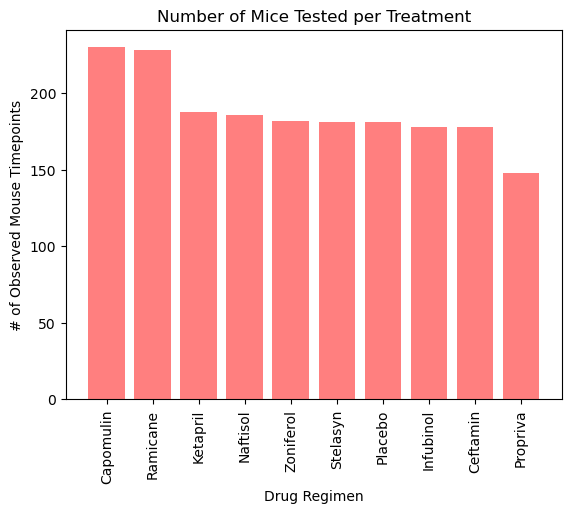

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_ct.index.values
y_axis = mice_ct.values
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

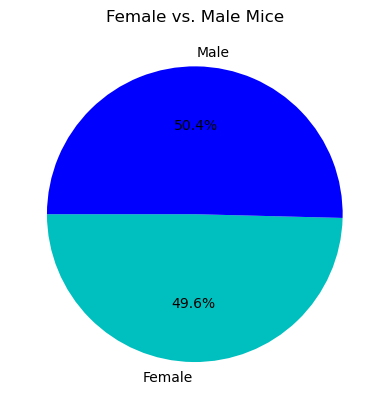

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
gender_counts = New_drop.groupby('Sex')['Mouse ID'].nunique()

# Create the pie chart
gender_counts.plot(
    kind='pie',
    colors=['c', 'b'],
    autopct='%1.1f%%',
    startangle=180,
    title='Female vs. Male Mice',
    ylabel='',  
)

# Show the plot
plt.show()

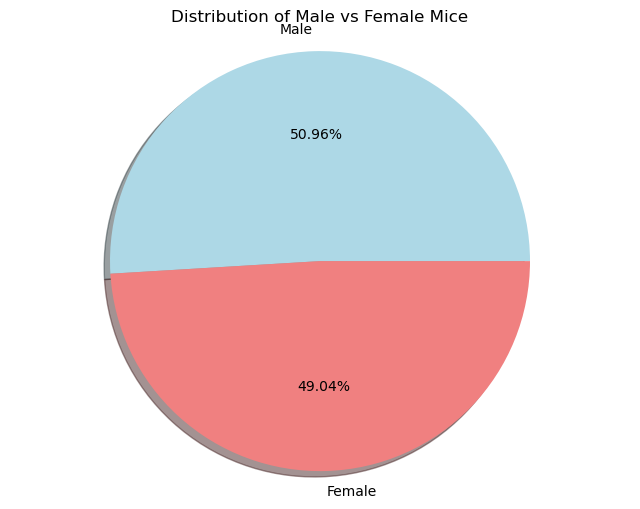

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
Sex_ct = New_drop["Sex"].value_counts()
# Get the unique mice with their gender
# Prepare data for the pie chart
labels = Sex_ct.index
sizes = Sex_ct.values
colors = ['lightblue', 'lightcoral']  # You can customize the colors
explode = (0, 0)  # "explode" the first slice (female) for emphasis

# Make the pie chart
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%0.2f%%', startangle=0, shadow=True)
# Make the chart more visually appealing
plt.title("Distribution of Male vs Female Mice")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = New_drop.loc[New_drop["Drug Regimen"] == "Capomulin",:]
Ramicane_df = New_drop.loc[New_drop["Drug Regimen"] == "Ramicane", :]
Infubinol_df = New_drop.loc[New_drop["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = New_drop.loc[New_drop["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, New_drop, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, New_drop, on=("Mouse ID", "Timepoint"), how="left")

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, New_drop, on=("Mouse ID", "Timepoint"), how="left")

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, New_drop, on=("Mouse ID", "Timepoint"), how="left")

combined_last_df = pd.concat([Capomulin_merge, Ramicane_merge, Infubinol_merge, Ceftamin_merge])

combined_last_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = {treatment: [] for treatment in treatments}

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    treatment_df = combined_last_df.loc[combined_last_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data[treatment] = treatment_df
    quartiles = treatment_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    # Determine outliers using upper and lower bounds
    outliers = treatment_df[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    print(f'{treatment} potential outliers: {outliers}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

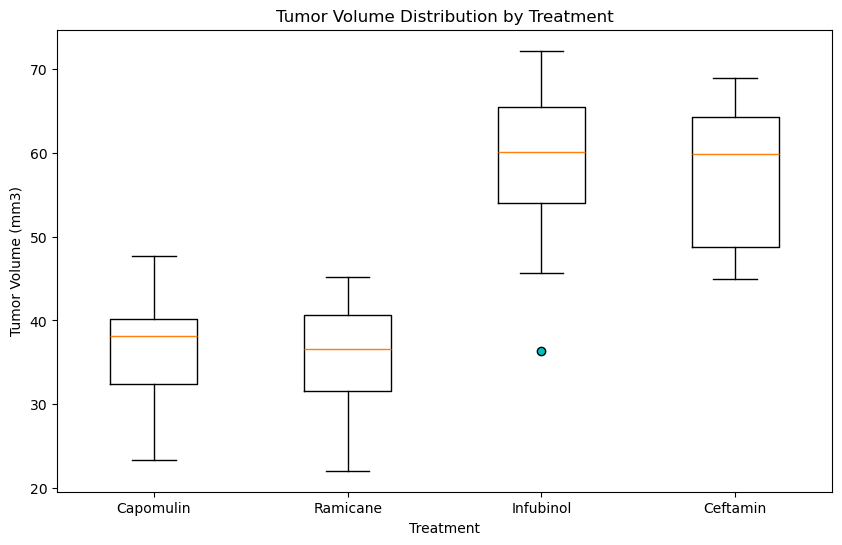

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
data_to_plot = [tumor_vol_data[treatment] for treatment in treatments]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_to_plot, labels=treatments, flierprops=dict(markerfacecolor='c', marker='o'))

ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

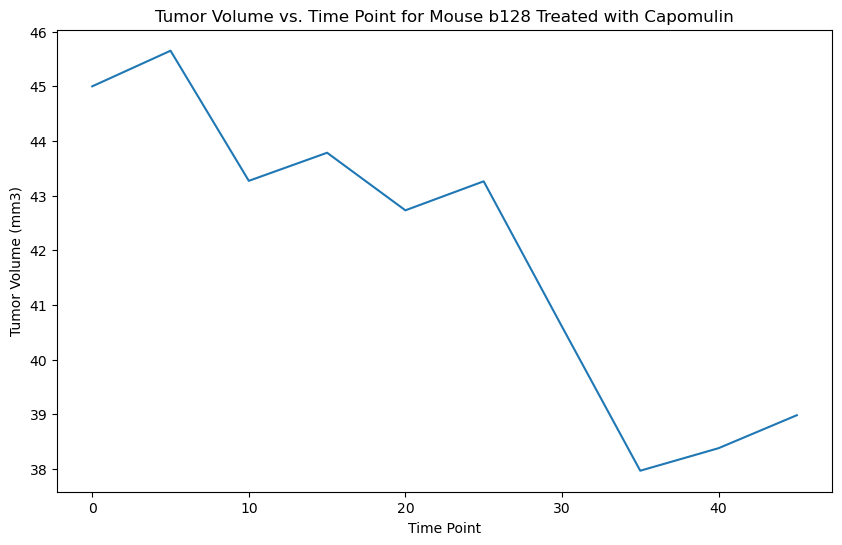

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
single_mouse_id = Capomulin_df['Mouse ID'].unique()[0]

single_mouse_data = Capomulin_df[Capomulin_df['Mouse ID'] == single_mouse_id]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])

ax.set_title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
ax.set_xlabel('Time Point')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

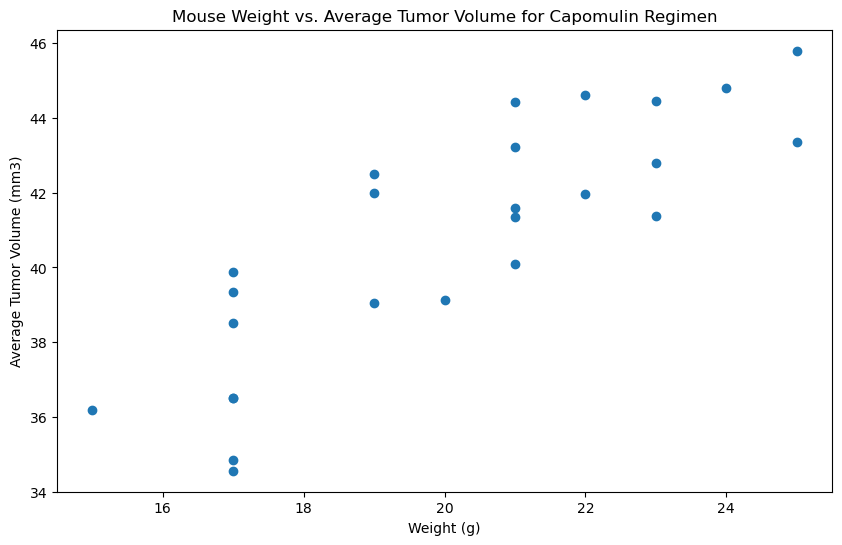

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_Average_tumor_vol = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_Average_tumor_vol = capomulin_Average_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

capomulin_merged_data = pd.merge(capomulin_Average_tumor_vol, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(capomulin_merged_data['Weight (g)'], capomulin_merged_data['Average Tumor Volume (mm3)'])

ax.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
plt.show()